### Python画图总结 

In [1]:
import pandas as pd
data = pd.read_csv("./data/data_analyze.csv")

In [2]:
data.head()

,时间,1#给煤机瞬时流量输出信号,高温省煤器进口O2浓度（左）,高温省煤器进口O2浓度（右）,一次风转速,二次风转速
0,2022-11-14 00:00:00,6.246,1.977,1.716,39.410,21.186
1,2022-11-14 00:00:05,6.138,1.928,1.747,39.418,21.632
2,2022-11-14 00:00:10,6.032,1.924,1.735,39.410,21.797
3,2022-11-14 00:00:15,5.993,1.955,1.676,39.413,21.973
4,2022-11-14 00:00:20,6.015,1.924,1.697,39.413,21.955


#### 图中图 

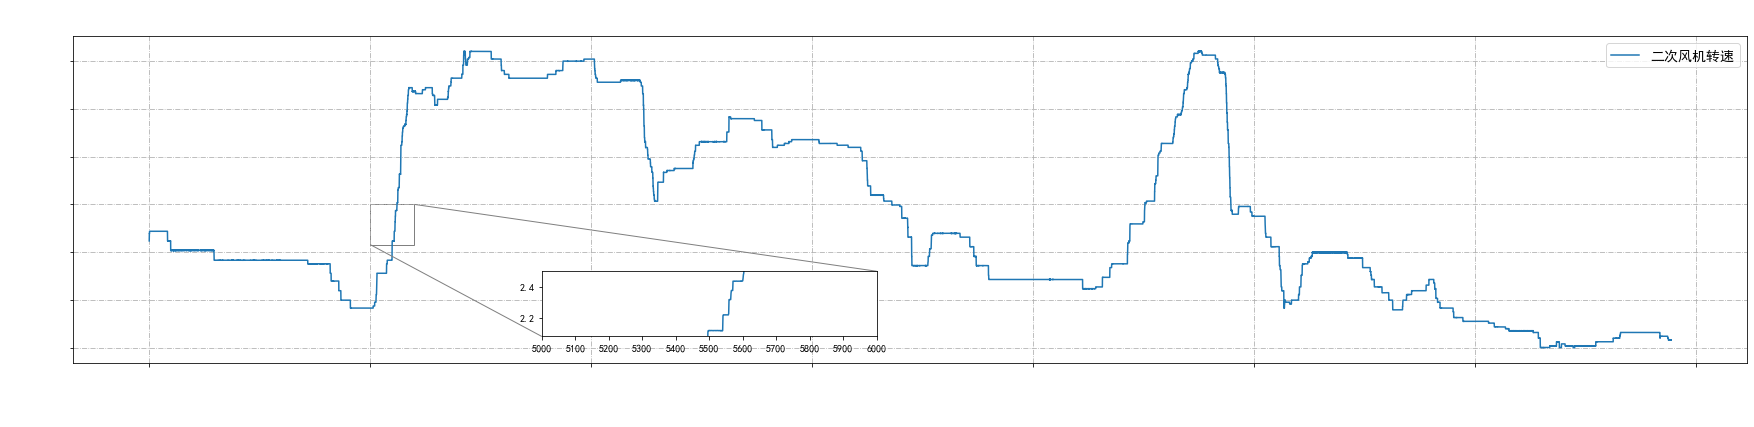

In [4]:
from matplotlib import ticker
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes,mark_inset
#用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei']
#用来正常显示负号
plt.rcParams['axes.unicode_minus']=False
# 绘图的长度尺寸
fig, ax = plt.subplots(1, 1, figsize=(30, 6))
# 包含的信息
ax.set_xlabel("下标", color="white", fontsize=25)
ax.set_ylabel("各点位数据参考值", color="white", fontsize=25)
plt.xticks(fontproperties = 'Times New Roman', size = 25, color="white")
plt.yticks(fontproperties = 'Times New Roman', size = 25, color="white")
ax.plot(data['二次风转速']/10, label='二次风机转速')
# 这是放大显示框的位置，分别是坐标x,y和长宽，其中数值是响应值*图的长宽
axins = ax.inset_axes((0.28, 0.08, 0.2, 0.2))
axins.plot(data['二次风转速']/10)
# 截取放大的数据段范围 x轴
axins.set_xlim(5000, 6000)
# 截取放大的数据段范围 y轴
axins.set_ylim(2.08,  2.5)
tick_spacing = 100
axins.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
# 1 2 3 4 右上-右下-
mark_inset(ax, axins, loc1=3, loc2=1, fc="none", ec='0.5', lw=1)
plt.grid(linestyle='-.')
plt.title('图中图示例', color="white", fontdict={'weight':'normal','size': 30})
plt.legend(fontsize=14)
plt.savefig("./imgs/1.png", bbox_inches="tight")

#### 3D散点图 

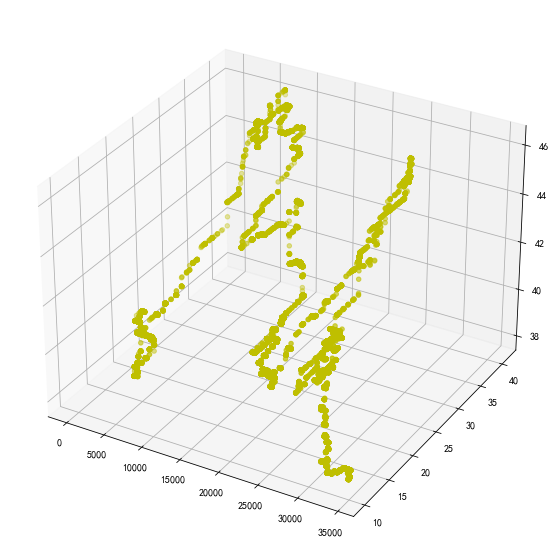

In [6]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection='3d') # 创建一个三维的绘图工程
# 将数据点分成三部分画，在颜色上有区分度
x = [i for i in range(len(data["时间"]))]
ax.scatter(x, data["二次风转速"].values, data["一次风转速"].values, c='y') # 绘制数据点
plt.savefig("./imgs/2.png", bbox_inches="tight")
plt.show()